/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


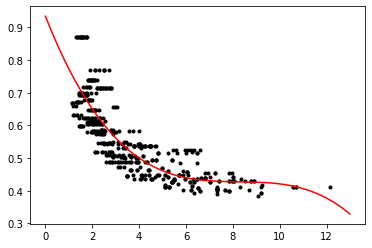

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("Boston.csv")

#a)
X = boston[['dis']]
y = boston['nox']
poly = PolynomialFeatures(degree = 3)
X_cub = poly.fit_transform(X)
lr = LinearRegression(fit_intercept = False)
lr.fit(X_cub, y)
coefs = lr.coef_
plt.plot(X, y, '.', color = 'black')

t = np.arange(0.0, 13, 0.01)
s = coefs[0] + coefs[1]*t + coefs[2]*(t**2) + coefs[3]*(t**3)
plt.plot(t,s, color = 'red')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

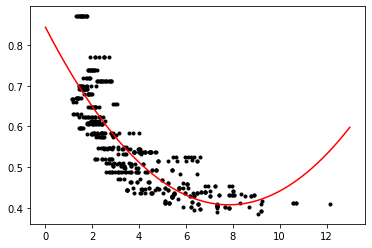

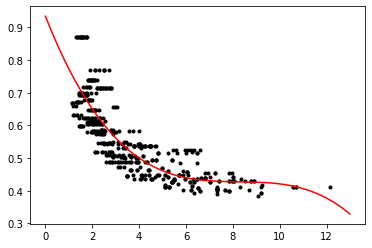

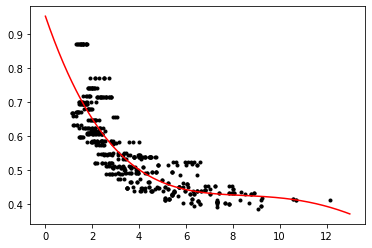

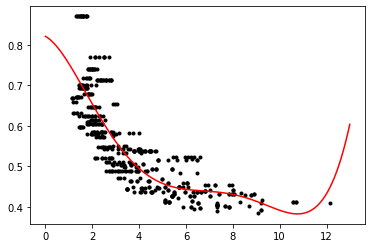

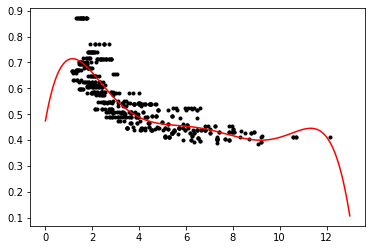

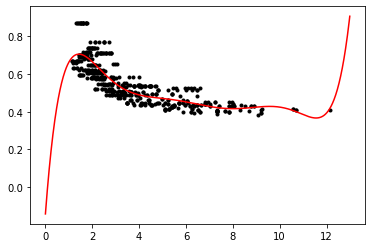

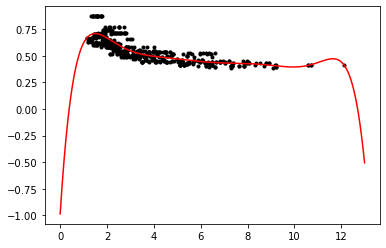

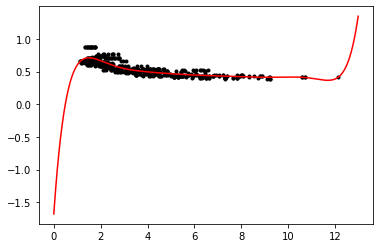

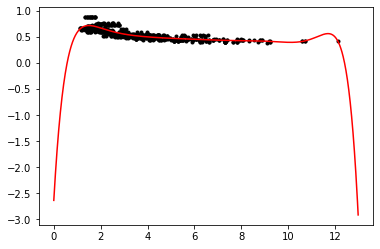

In [3]:
#b)
mse_tab = []
for i in range(2,11):
    poly = PolynomialFeatures(degree = i)
    X_deg = poly.fit_transform(X)
    lr = LinearRegression(fit_intercept = False)
    lr.fit(X_deg, y)
    coefs = lr.coef_
    plt.figure(i)
    plt.plot(X, y, '.', color = 'black')
    t = np.arange(0.0, 13, 0.01)
    s = coefs[0]
    j = 1
    while j <= i:
        s += coefs[j]*(t**j)
        j += 1
    plt.plot(t,s, color = 'red')
    y_pred = lr.predict(X_deg)
    mse_tab.append(len(y)*mean_squared_error(y, y_pred))

In [4]:
#c)

def f(i):
    poly = PolynomialFeatures(degree = i)
    X_deg = poly.fit_transform(X)
    lr = LinearRegression(fit_intercept = False)
    lr.fit(X_deg, y)
    y_pred = cross_val_predict(lr, X_deg, y)
    return(mean_squared_error(y, y_pred))
    
deg = 2
min = f(deg)
for i in range(2,11):
    if f(i) < min:
        min = f(i)
        deg = i
print(deg)

2
